# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
from keras.datasets import cifar10
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_train_10,y_train_10),(x_test_10,y_test_10) = cifar10.load_data()
(x_train_100,y_train_100),(x_test_100,y_test_100) = cifar100.load_data(label_mode="coarse")

# Image normalize 

In [3]:
print('train:',len(x_train_10))
print('test :',len(x_test_10))
print('train:',len(x_train_100))
print('test :',len(x_test_100))

train: 50000
test : 10000
train: 50000
test : 10000


In [4]:
print(y_train_10[0:5])
print(y_train_100[0:5])

[[6]
 [9]
 [9]
 [4]
 [1]]
[[11]
 [15]
 [ 4]
 [14]
 [ 1]]


In [5]:
print(x_train_10.shape)
print(x_train_100.shape)

(50000, 32, 32, 3)
(50000, 32, 32, 3)


In [6]:
print(y_train_10.shape)
print(y_train_100.shape)

(50000, 1)
(50000, 1)


In [7]:
label_dict={0:"aquatic mammals",1:"fish",2:"flowers",3:"food containers",4:"fruit and vegetables",
            5:"household electrical devices",6:"household furniture",7:"insects",8:"large carnivores",9:"large man-made outdoor things",10:"large natural outdoor scenes",11:"large omnivores and herbivores",12:"medium-sized mammals",13:"non-insect invertebrates",14:"people",15:"reptiles",16:"small mammals",17:"trees",18:"vehicles 1",19:"vehicles 2"}

In [10]:
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=20):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(10,10, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

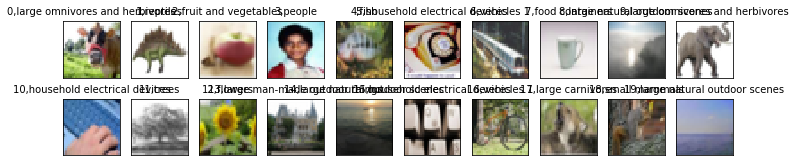

In [11]:
plot_images_labels_prediction(x_train_100,y_train_100,[],0)

In [12]:
x_train_100[0][0][0]

array([255, 255, 255], dtype=uint8)

In [13]:
x_train_100_nor = x_train_100.astype("float32") / 255.0
x_test_100_nor = x_test_100.astype("float32") / 255.0

In [14]:
x_train_100_nor[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [15]:
from keras.utils import np_utils
y_train_100_one = np_utils.to_categorical(y_train_100)
y_test_100_one = np_utils.to_categorical(y_test_100)

In [16]:
y_train_100_one.shape

(50000, 20)

In [17]:
y_train_100_one[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

CIFAR100 跟 CIFAR10 數據差異在於CIFAR100分成100種，因為種類太多所以先分成較廣泛的"super class"，在寫程式時，因為種類太多不好做索引，所以使用super class分成20種